# Libraries

In [107]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns


# estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor


# tools
from sklearn.model_selection import train_test_split

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV 

# Import Data

In [2]:
# import claned and pre-procesed data
df = pd.read_csv('DF_M2T2_Light.csv')
df.head()

,Unnamed: 0,ID,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,Y_default
0,1,1,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,689.0,0.0,0.0,1
1,2,2,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,1000.0,1000.0,1000.0,1
2,3,3,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,1518.0,1500.0,1000.0,1000.0,0
3,4,4,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,2019.0,1200.0,1100.0,0
4,5,5,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2000.0,36681.0,10000.0,9000.0,0


## Define the features and Dependent Values

In [98]:
y = df[['Y_default']]
X = df.drop('Y_default', axis=1)

# Phase 0 >> Divide data into: Train - Validation - Test

Split data into: train, validation and test sets, or just train and test (depending on the function you will use).

In [6]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now <train_ratio> % of the entire data set the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-train_ratio) )

# test is now <test_ratio> % of the initial data set
# validation is now <validation_ratio> % of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print('DF: ', df.shape)
print('X:      ', X.shape, 'y:      ', y.shape)
print('X_Train:', X_train.shape,'y_Train:', y_train.shape)
print('X_Valid:', X_val.shape, ' y_Valid:', y_val.shape)
print('X_Test: ', X_test.shape,' y_Test: ', y_test.shape)

DF:  (30000, 14)
X:       (30000, 13) y:       (30000, 1)
X_Train: (22500, 13) y_Train: (22500, 1)
X_Valid: (4500, 13)  y_Valid: (4500, 1)
X_Test:  (3000, 13)  y_Test:  (3000, 1)


# Phase 1

Train the model on the training set and get the first performance measures on the validation set.

In [34]:
# list of possible candidates
algo_Candidates = []

algo_Candidates.append(('Random Forest Regressor', RandomForestRegressor()))
algo_Candidates.append(('Linear Regression', LinearRegression()))
algo_Candidates.append(('Suport Vector Regression', SVR()))
algo_Candidates.append(('Logistic Regression', LogisticRegression()))
algo_Candidates.append(('k-NN', KNeighborsClassifier()))
algo_Candidates.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
algo_Candidates.append(('Desicion Tree Regressor', DecisionTreeRegressor()))

In [36]:
models=[]
performance=[]

for name, model in algo_Candidates:
    # train the model
    model = model.fit(X_train, y_train.values.ravel())
    
    # Get predictions and performance
    y_val_pred = model.predict(X_val)
    
    # Measure
    predictions = model.predict(X_val)
    predRsquared = r2_score(y_val,predictions)
    rmse = sqrt(mean_squared_error(y_val, predictions))
    
    # print results
    print('MODEL: ',name)
    print('R Squared: %.3f' % predRsquared)
    #print('RMSE: %.3f' % rmse)
    #print('-')
    print('Train score: {}'.format(model.score(X_train,y_train)))
    print('Validation score: {}'.format(model.score(X_test,y_test)))
    print('R sqared (Overall model accuracy): {}'.format(r2_score(y_val,predictions)))
    print('RMSE (Mean Squared Error): {}'.format(mean_squared_error(y_val,predictions)))
    print('-------------------------------- \n')
    
    # save the models into a list of tuples
    models.append((name,model))

MODEL:  Random Forest Regressor
Train score: 0.8826002198650864
Validation score: 0.1902216843149238
R sqared (Overall model accuracy): 0.17209411428571442
RMSE (Mean Squared Error): 0.14309484444444442
-------------------------------- 

MODEL:  Linear Regression
Train score: 0.11490770771258962
Validation score: 0.12589114584674954
R sqared (Overall model accuracy): 0.10735447337837256
RMSE (Mean Squared Error): 0.15428441200867635
-------------------------------- 

MODEL:  Suport Vector Regression
Train score: -0.08331861633239535
Validation score: -0.09653986963076666
R sqared (Overall model accuracy): -0.08669260685055491
RMSE (Mean Squared Error): 0.18782341352972554
-------------------------------- 

MODEL:  Logistic Regression
Train score: 0.7802666666666667
Validation score: 0.7693333333333333
R sqared (Overall model accuracy): -0.2857142857142856
RMSE (Mean Squared Error): 0.2222222222222222
-------------------------------- 

MODEL:  k-NN
Train score: 0.8097333333333333
Valida

* from this list of algorithms I choose **Gradient boosting Regresor**. It's performing poorly but has acceptable values. 



* **Random Forest Regressor** is overfitting, because it's performing pretty well on the training set, but poorly in the validation set. 
* **Linear Regression** has a very low score, but it's not overfitting. 
* **SVR** has negative values everywhere. 
* **LogReg** is ding nice on the train/val, but with negative values on R2.
* **k-NN** is ding nice on the train/val, but with negative values on R2.
* **Decision Tree Regressor** is oferfitting a lot. 

# Phase 2: 

Train with Cross-Validation and select the best candidates

### Cross Validation 

In [37]:
results = []
names = []
for name, model in models:
    result = cross_val_score(model, X_train, y_train.values.ravel(), cv=3, scoring='r2')
    names.append(name)
    results.append(result)

### Define the best candidates

As we used **r2** as scoring in the Cross-Val, we want to use the algorithms with values as close as possible to 1.  

In [38]:
for i in range(len(names)):
    
    print(names[i], ' r2 -> ', round(results[i].mean(),2))

Random Forest Regressor  r2 ->  0.16
Linear Regression  r2 ->  0.11
Suport Vector Regression  r2 ->  -0.08
Logistic Regression  r2 ->  -0.28
k-NN  r2 ->  -0.44
Gradient Boosting Regressor  r2 ->  0.21
Desicion Tree Regressor  r2 ->  -0.61


So the best algorithm is **Gradient Boosting Regressor**. 

The negative values means that this model is not performing better than the most stupid one that's an horizontal line simple line, wich predicts always the same value. 

# Phase 3:

Find a better hyper-parameters values combination

## Gradient Boosting Regressor


In [40]:
gradient_model = GradientBoostingRegressor()  # instantiate the model

# print the state of full list of parametrizable parameters
gradient_model.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [67]:
params = {
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'max_depth':[2,3,4,5,6,7],
    'learning_rate' : [0.05,0.1,0.2,0.3,0.4,0.5]
         }   

gradient_search = RandomizedSearchCV(gradient_model,params,cv=4,n_jobs=-1,n_iter=50)   # initialize the search

gradient_search.fit(X_train,y_train.values.ravel())   # fit the model

gradient_pred = gradient_search.predict(X_val)  # make predictions with the model

In [49]:
# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(X_train,y_train)))
print('Test score: {}\n'.format(gradient_search.score(X_val,y_val)))
print('Overall model accuracy: {}\n'.format(r2_score(y_val,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_val,gradient_pred)))

Best parameter found:
{'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.05}

Train score: 0.2601606499756818

Test score: 0.2134446373903629

Overall model accuracy: 0.2134446373903629

Mean Squared Error: 0.1359478404510484



## Random Forest Regressor

In [12]:
model_RF = RandomForestRegressor()

# print the full list of parametrizable parameters
model_RF.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### using RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [13]:
#Setup the parameters and distributions to sample from: param_dist

# numers of trees
n_estimators = [2,5,8,10]
# max number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# max number of levels in tree
max_depth = [5, 10, 15, 20]# 30, 40, 50]
max_depth.append(None)
# min number of samples required to split a node
min_samples_split = [2,5,10,20,30]
# min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10,15]


param_dist = {#'bootstrap': True, 
              #'ccp_alpha': 0.0,
              #'criterion': 'mse',
              'n_estimators': n_estimators, 
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
              #'max_leaf_nodes': None,
              #'max_samples': None,
              #'min_impurity_decrease': 0.0, 
              #'min_impurity_split': None, 
              #'min_weight_fraction_leaf': 0.0,           
              #'n_jobs': None, 
              #'oob_score': False, 
              #'random_state': None,
              #'verbose': 0, 
              #'warm_start': False
             }

In [14]:
# instantiate the RandomizedSearchCV object: model_cv
model_CV1 = RandomizedSearchCV(model_RF, param_dist, cv=3)

In [15]:
# Fit it to the data
model_CV1.fit(X_train,y_train.values.ravel())

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 20, 30],
                                        'n_estimators': [2, 5, 8, 10]})

In [16]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(model_CV1.best_params_))

Tuned Decision Tree Parameters: {'n_estimators': 5, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 5}


In [17]:
result_CV1 = cross_val_score(model_CV1, X_val, y_val.values.ravel(), cv=3, scoring='r2')
print(result.mean())

-0.08364894447276616


# Phase 4

In [50]:
# define the model
name = 'Gradient Boosting Regressor'
model = gradient_search

# train the model
model_test = model.fit(X_test, y_test.values.ravel())

# make predictions with the model
model_pred = model.predict(X_test)

In [66]:
# Measure
print('MODEL: ',name)
#print('R Squared: %.3f' % predRsquared)
#print('RMSE: %.3f' % rmse)
#print('-')

print('Train score: %.3f' % model.score(X_test,y_test))
print('Validation score: %.3f' % model.score(X_val,y_val))
print('Test score: %.3f' % model.score(X_test,y_test))
print('R sqared (Overall model accuracy): %.3f' % r2_score(y_test,model_pred))
print('RMSE (Mean Squared Error): %.3f' % mean_squared_error(y_test,model_pred))
print('-------------------------------- \n')

MODEL:  Gradient Boosting Regressor
Train score: 0.238
Validation score: 0.206
Test score: 0.238
R sqared (Overall model accuracy): 0.238
RMSE (Mean Squared Error): 0.135
-------------------------------- 



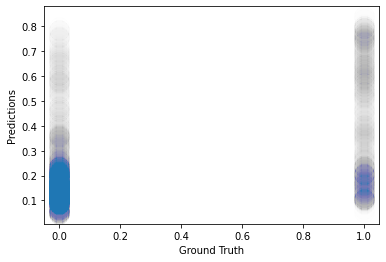

In [97]:
plt.scatter(y_test, model_pred, alpha = 0.002, s=400)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

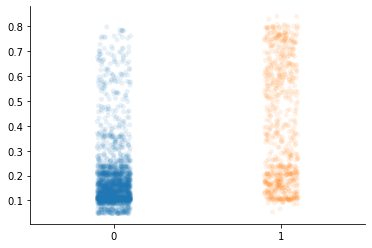

In [125]:
true_val = y_test.values.ravel()
pred_val = model_pred
sns.stripplot(x=test, y=pred_val, data=df, jitter=True, alpha=.1, size = 5)
sns.despine()

In [104]:
import random

for a in range(10):
    a = random.randint(0, len(X))
    print('Checking the row #:', a)
    print('Actual value: ', y['Y_default'][a])
    print('Predicted value: %.2f' % model.predict(X)[a])
    print('')

Checking the row #: 6452
Actual value:  0
Predicted value: 0.09

Checking the row #: 27540
Actual value:  1
Predicted value: 0.11

Checking the row #: 29128
Actual value:  0
Predicted value: 0.13

Checking the row #: 3544
Actual value:  1
Predicted value: 0.30

Checking the row #: 6769
Actual value:  0
Predicted value: 0.15

Checking the row #: 28069
Actual value:  0
Predicted value: 0.11

Checking the row #: 18607
Actual value:  0
Predicted value: 0.19

Checking the row #: 6592
Actual value:  0
Predicted value: 0.08

Checking the row #: 13225
Actual value:  0
Predicted value: 0.13

Checking the row #: 19948
Actual value:  0
Predicted value: 0.05

